<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#we will need this imports for preprocessing sections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

## Loading Data to Pandas DataFrame

In [10]:
df = pd.read_csv("./real-estate.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Dropping Nan-Values

In [12]:
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after dropping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after dropping ? value from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(414, 8)
after dropping nans: (414, 8)
after dropping ? value from No: (414, 8) 
after dropping ? value from X1 transaction date: (414, 8) 
after dropping ? value from X2 house age: (414, 8) 
after dropping ? value from X3 distance to the nearest MRT station: (414, 8) 
after dropping ? value from X4 number of convenience stores: (414, 8) 
after dropping ? value from X5 latitude: (414, 8) 
after dropping ? value from X6 longitude: (414, 8) 
after dropping ? value from Y house price of unit area: (414, 8) 
final shape (414, 8)


## Droping Unnecessary Columns

In [13]:
y = df["Y house price of unit area"]

#Number is just an index value >> No useful data
#Y is output not learning input
df = df.drop(['No',"Y house price of unit area"],axis = 1)
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


## Splitting Data to Train and Test

In [14]:
xtrain , xtest , ytrain , ytest = train_test_split(df,y,test_size = 0.1 , random_state = 2)

In [15]:
def standardScalerFunction(data):
    scaler = MinMaxScaler().fit(data)
    return scaler.transform(data.astype(float))

## Visualizing Data Distribution and Correlation

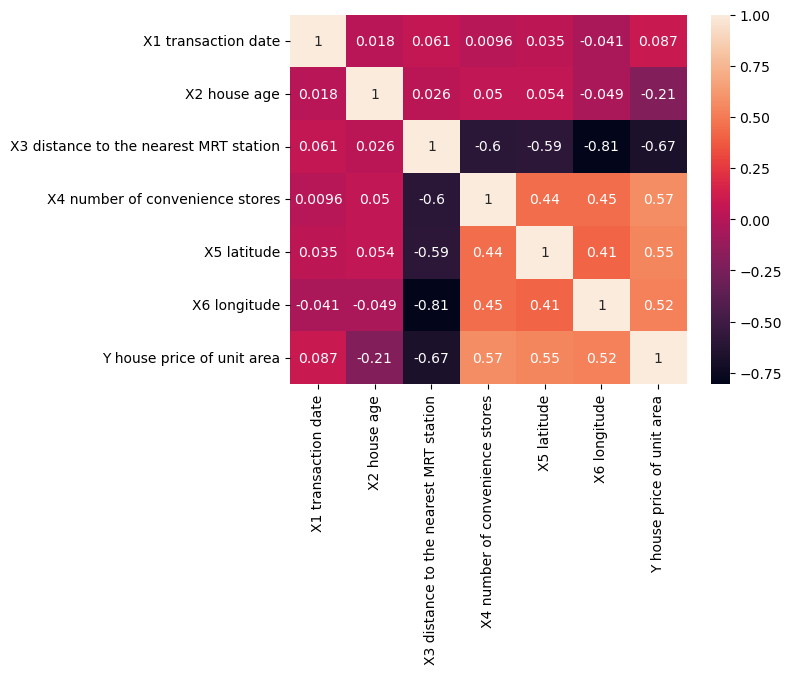

In [16]:
import seaborn as sns

df.insert(6 ,"Y house price of unit area", y)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


inferred from correlation map, transaction date and house age are not useful for our predictions in our regression models

In [17]:
'''
    this function will plot given column boxplot and save it in ./boxplots/ directory
    args -> 
        title : given feature(column) name(will be used for saving plot)
        data: column data which we are going to visualize its Distribution and outliers ni plot
'''
def box_plot(data,title):
    plt.boxplot(data, patch_artist=True)
    plt.title(f"{title} BOX PLOT")
    plt.ylabel(f"{title} Rate")
    plt.savefig(f'./boxplots/{title}.png')
    plt.close()


In [18]:
for (column_name , _) in df.items():
    if column_name != "Y house price of unit area":
        box_plot(df[f"{column_name}"],column_name)

In [19]:
'''
    this function will plot output(y column) and each feature of our data
    args -> 
        title : given feature(column) name(will be used for saving plot)
        x: column data which we are going to visualize its Distribution with outputs
'''
def  house_price_plotter(title,x,y):
    plt.figure(figsize=(10,5))
    plt.plot(x,y,'r')
    plt.xlabel(title)
    plt.ylabel('house price')
    plt.savefig(f'./house_price_plots/{title}.png')
    plt.close()

In [20]:
for (column_name , _) in df.items():

    if column_name != "Y house price of unit area":
        house_price_plotter(column_name,df[f"{column_name}"],df["Y house price of unit area"])

after analyzing the plots and boxplot and correlation plots we may infer that X1 transaction date is not useful for training and prediction

## Linear Regression

Coefficients:
 [ 5.68331267e+00 -2.72019317e-01 -4.79962294e-03  1.05870818e+00
  2.07395538e+02 -2.18349490e+01]
Mean Squared Error: 45.24081883593
R2 Score: 0.6861910987975295


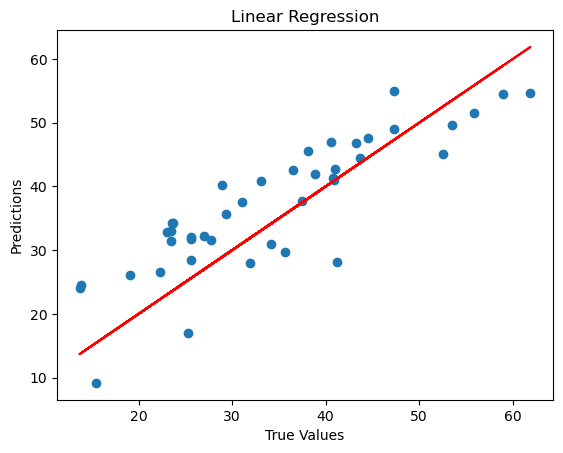

In [33]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Linear Regression')
plt.show()

## Polynomial Regression

Coefficients:
 [ 2.66809715e+02 -1.55059776e+04  9.09733980e+02  2.10727884e+01
  8.13465585e+03  5.75304556e+05  7.61167462e+05  7.62692077e+00
  1.00274999e-01 -3.53300575e-03 -5.93994121e-01 -8.41011398e+01
 -1.07713971e+02  1.88019236e-02 -5.32588661e-05  1.66269911e-02
 -8.85340815e+00 -7.33589915e+00 -8.57365309e-08 -1.35178019e-03
 -2.92914109e-01 -5.47265999e-02 -2.23970688e-03 -1.14894222e+02
 -3.34772884e+01  5.31464189e+03 -5.51461091e+03 -1.67194278e+03]
Mean Squared Error: 26.262147246465425
R2 Score: 0.8178349600497149


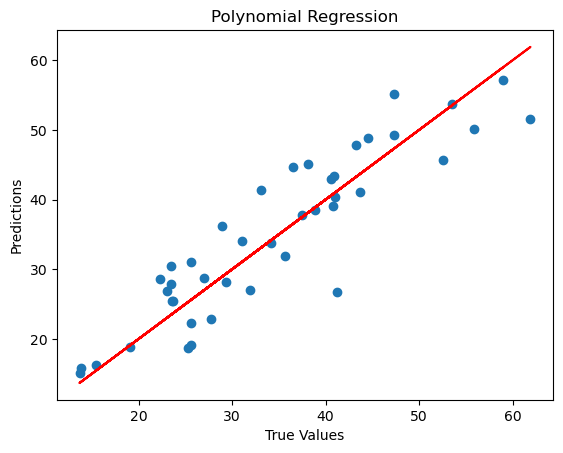

In [25]:

poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(xtrain)
x_poly_test = poly_features.transform(xtest)
poly_model = LinearRegression()
poly_model.fit(x_poly_train, ytrain)
poly_predictions = poly_model.predict(x_poly_test)
mse = mean_squared_error(ytest, poly_predictions)
r2 = r2_score(ytest, poly_predictions)

print("Coefficients:\n", poly_model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, poly_predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression')
plt.show()

## Ridge Regression

Coefficients:
 [ 5.83101884e+00 -2.59906055e-01 -5.64882329e-03  1.15762458e+00
  7.15014663e+00 -1.32673513e+00]
Mean Squared Error: 56.21275741606176
R2 Score: 0.6100852263026298


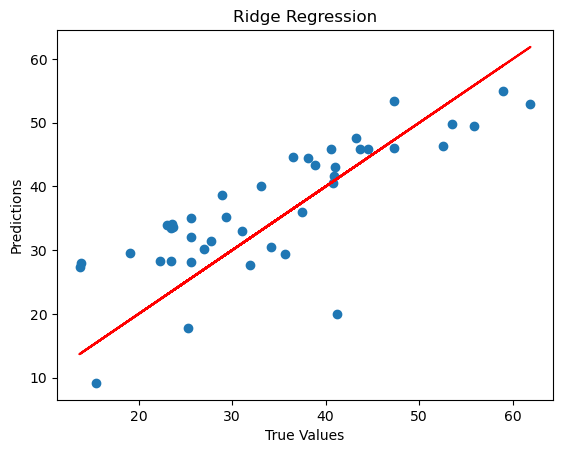

In [26]:

model = Ridge(alpha=1.0)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()


## Lasso Regression

Coefficients:
 [ 4.77217319 -0.25721563 -0.0056823   1.14573119  0.         -0.        ]
Mean Squared Error: 56.715673092645794
R2 Score: 0.6065967966073434


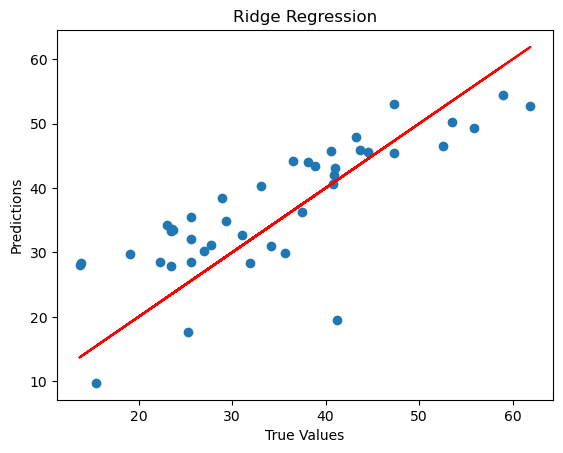

In [27]:
model = Lasso(alpha=0.1)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

## Elastic Net Regression

Coefficients:
 [ 3.30569704 -0.25615909 -0.00566092  1.14888966  0.         -0.        ]
Mean Squared Error: 56.679951901700306
R2 Score: 0.606844573459502


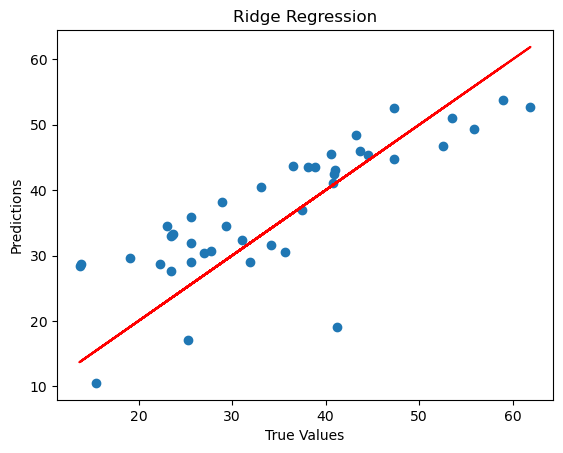

In [28]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)


print("Coefficients:\n", model.coef_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

## XGBoost Regression 

Mean Squared Error: 37.19287921360168
R2 Score: 0.7420149135473396


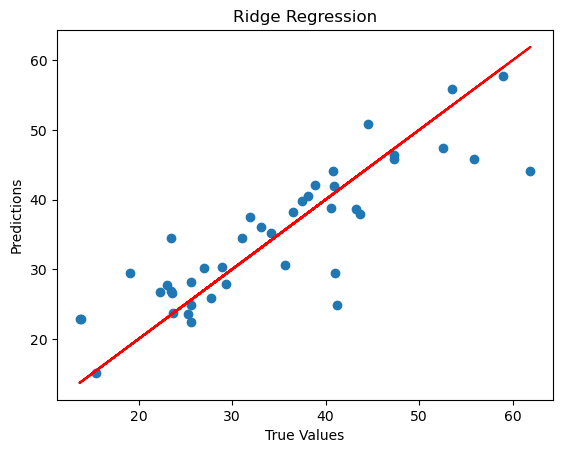

In [31]:
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.1 ,max_depth = 6, alpha = 10, n_estimators = 100)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
mse = mean_squared_error(ytest, predictions)
r2 = r2_score(ytest, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.scatter(ytest, predictions)
plt.plot(ytest,ytest , 'r' )
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression')
plt.show()

# Assosiation Rules

In [1]:
# 0. Import Libraries


# 1. Data Loading


# 2. Preprocess Data


# 3. Apply TransactionEncoder


# 4. Generate Frequent Itemsets


# 5. Generate Association Rules


# 6. Display Rules

